<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/Modified_Tugas_Week_2_Classification_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Model for Classification
Notebook ini mencakup model klasifikasi menggunakan PyTorch dan TensorFlow, serta evaluasi menggunakan berbagai metrik.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from google.colab import files
uploaded = files.upload()

Saving compressed_data.csv.gz to compressed_data.csv.gz


In [4]:
# Load dataset
df = pd.read_csv("compressed_data.csv.gz")

# Pisahkan fitur dan target
X = df.drop(columns=["Cover_Type"]).values
y = df["Cover_Type"].values - 1  # Ubah dari 1-7 ke 0-6 agar cocok dengan PyTorch dan TensorFlow

# Pisah dataset jadi training & testing (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi data agar lebih stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch Model
class MLPClassification(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLPClassification, self).__init__()
        self.hidden1 = nn.Linear(input_size, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Inisialisasi model PyTorch
input_size = X_train.shape[1]
num_classes = len(set(y))
model = MLPClassification(input_size, num_classes)

# Loss dan optimizer PyTorch
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Ubah data ke tensor PyTorch
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=64, shuffle=False)

# Training loop PyTorch
num_epochs = 10
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.5102


In [5]:
# Evaluasi Model PyTorch
with torch.no_grad():
    y_pred_torch = model(X_test_torch)
    y_pred_classes_torch = torch.argmax(y_pred_torch, dim=1)

accuracy = accuracy_score(y_test, y_pred_classes_torch.numpy())
precision = precision_score(y_test, y_pred_classes_torch.numpy(), average='weighted')
recall = recall_score(y_test, y_pred_classes_torch.numpy(), average='weighted')
f1 = f1_score(y_test, y_pred_classes_torch.numpy(), average='weighted')

print(f"PyTorch Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# TensorFlow Model
model_tf = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model TensorFlow
model_tf.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluasi Model TensorFlow
y_pred_tf = model_tf.predict(X_test)
y_pred_classes_tf = y_pred_tf.argmax(axis=1)

accuracy_tf = accuracy_score(y_test, y_pred_classes_tf)
precision_tf = precision_score(y_test, y_pred_classes_tf, average='weighted')
recall_tf = recall_score(y_test, y_pred_classes_tf, average='weighted')
f1_tf = f1_score(y_test, y_pred_classes_tf, average='weighted')

print(f"TensorFlow Model Evaluation:")
print(f"Accuracy: {accuracy_tf:.4f}")
print(f"Precision: {precision_tf:.4f}")
print(f"Recall: {recall_tf:.4f}")
print(f"F1 Score: {f1_tf:.4f}")

PyTorch Model Evaluation:
Accuracy: 0.8261
Precision: 0.8346
Recall: 0.8261
F1 Score: 0.8235


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7219 - loss: 0.6670 - val_accuracy: 0.7851 - val_loss: 0.4997
Epoch 2/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7989 - loss: 0.4715 - val_accuracy: 0.8072 - val_loss: 0.4495
Epoch 3/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8183 - loss: 0.4321 - val_accuracy: 0.8244 - val_loss: 0.4199
Epoch 4/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8292 - loss: 0.4066 - val_accuracy: 0.8295 - val_loss: 0.4015
Epoch 5/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8374 - loss: 0.3899 - val_accuracy: 0.8411 - val_loss: 0.3858
Epoch 6/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8439 - loss: 0.3769 - val_accuracy: 0.8447 - val_loss: 0.3754
Epoch 7/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8471 - loss: 0.3691 - val_accuracy: 0.8465 - val_loss: 0.3690
Epoch 8/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8507 -

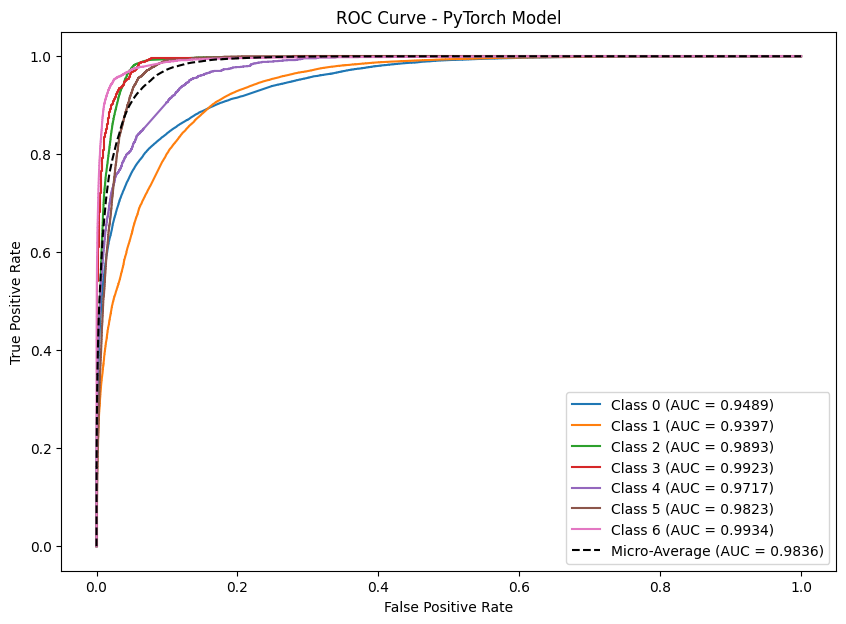

PyTorch Model Evaluation:
Accuracy: 0.8261
Precision: 0.8346
Recall: 0.8261
F1 Score: 0.8235
ROC AUC: 0.9501
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


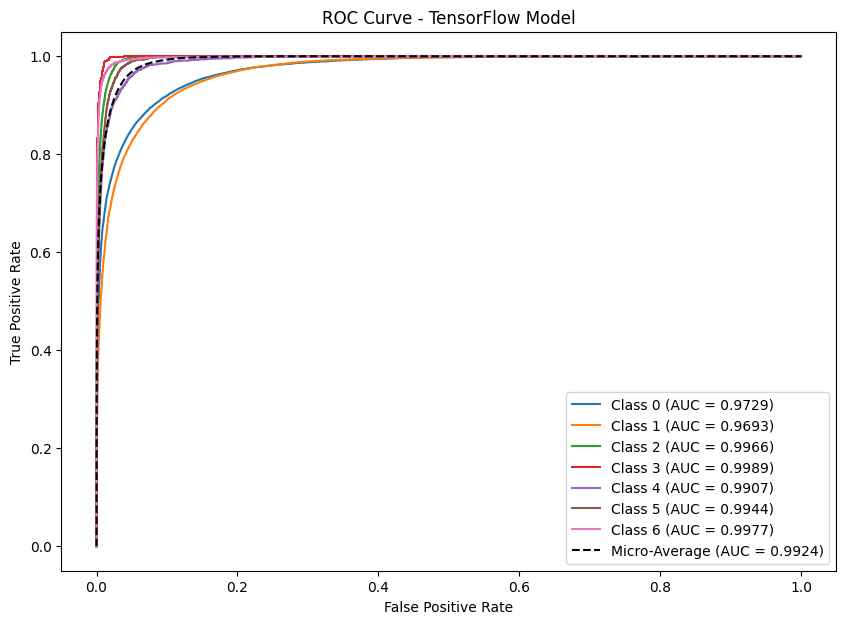

TensorFlow Model Evaluation:
Accuracy: 0.8848
Precision: 0.8848
Recall: 0.8848
F1 Score: 0.8846
ROC AUC: 0.9745


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisasi label untuk evaluasi ROC AUC
num_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))

# === PyTorch Model ROC AUC & ROC Curve ===
with torch.no_grad():
    y_pred_proba_torch = torch.softmax(model(X_test_torch), dim=1).numpy()

roc_auc_torch = roc_auc_score(y_test_bin, y_pred_proba_torch, average='weighted', multi_class='ovr')

# ROC Curve PyTorch
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_torch[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.4f})")

# Micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_proba_torch.ravel())
plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-Average (AUC = {auc(fpr_micro, tpr_micro):.4f})", color='black')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PyTorch Model")
plt.legend()
plt.show()

print(f"PyTorch Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc_torch:.4f}")

# === TensorFlow Model ROC AUC & ROC Curve ===
y_pred_proba_tf = model_tf.predict(X_test)
roc_auc_tf = roc_auc_score(y_test_bin, y_pred_proba_tf, average='weighted', multi_class='ovr')

# ROC Curve TensorFlow
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_tf[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.4f})")

# Micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_proba_tf.ravel())
plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-Average (AUC = {auc(fpr_micro, tpr_micro):.4f})", color='black')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TensorFlow Model")
plt.legend()
plt.show()

print(f"TensorFlow Model Evaluation:")
print(f"Accuracy: {accuracy_tf:.4f}")
print(f"Precision: {precision_tf:.4f}")
print(f"Recall: {recall_tf:.4f}")
print(f"F1 Score: {f1_tf:.4f}")
print(f"ROC AUC: {roc_auc_tf:.4f}")

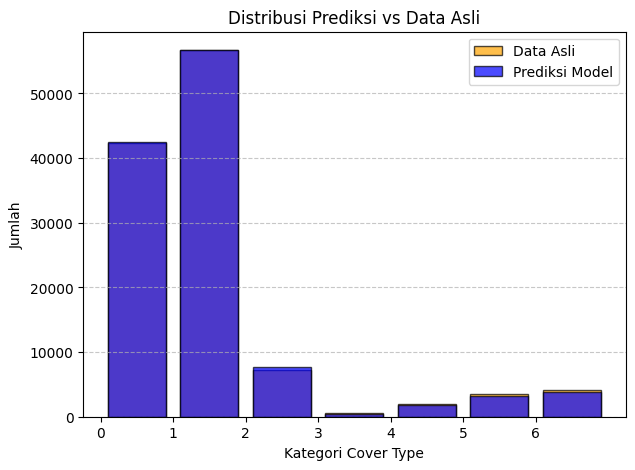

In [12]:
# Visualisasi distribusi prediksi
plt.figure(figsize=(7, 5))
plt.hist(y_test, bins=range(num_classes+1), alpha=0.7, label="Data Asli", color="orange", edgecolor="black", rwidth=0.8)
plt.hist(y_pred_classes_tf, bins=range(num_classes+1), alpha=0.7, label="Prediksi Model", color="blue", edgecolor="black", rwidth=0.8)
plt.legend()
plt.xlabel("Kategori Cover Type")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.xticks(range(num_classes))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## **Persamaan Matematis dalam Evaluasi Model Klasifikasi**

### **1. Akurasi (Accuracy)**
Akurasi mengukur seberapa sering model membuat prediksi yang benar dibandingkan dengan keseluruhan prediksi:

\[
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\]

Dimana:
- \( TP \) = True Positive (Prediksi benar sebagai positif)
- \( TN \) = True Negative (Prediksi benar sebagai negatif)
- \( FP \) = False Positive (Prediksi salah sebagai positif)
- \( FN \) = False Negative (Prediksi salah sebagai negatif)

---

### **2. Presisi (Precision)**
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif:

\[
Precision = \frac{TP}{TP + FP}
\]

Presisi yang tinggi berarti model jarang memberikan prediksi positif yang salah.

---

### **3. Recall (Sensitivity)**
Recall mengukur seberapa banyak data positif yang berhasil diklasifikasikan dengan benar:

\[
Recall = \frac{TP}{TP + FN}
\]

Recall yang tinggi berarti model mampu menangkap sebagian besar kasus positif.

---

### **4. F1-Score**
F1-Score adalah rata-rata harmonik dari Precision dan Recall, digunakan ketika ada ketidakseimbangan kelas:

\[
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\]

F1-Score memberikan keseimbangan antara Precision dan Recall.

---

### **5. ROC Curve (Receiver Operating Characteristic)**
ROC Curve digunakan untuk mengevaluasi performa model dengan memplot **True Positive Rate (TPR)** terhadap **False Positive Rate (FPR)** pada berbagai ambang batas.

**Rumus True Positive Rate (TPR) atau Recall:**
\[
TPR = \frac{TP}{TP + FN}
\]

**Rumus False Positive Rate (FPR):**
\[
FPR = \frac{FP}{FP + TN}
\]

Kurva ROC dibuat dengan memplot **TPR (sumbu Y)** terhadap **FPR (sumbu X)**.

---

### **6. Area Under Curve (AUC)**
AUC adalah luas di bawah kurva ROC dan digunakan untuk mengukur seberapa baik model dalam membedakan kelas.  

Untuk kasus **multi-kelas**, AUC dihitung dengan pendekatan **One-vs-Rest (OvR)**:

\[
AUC = \frac{1}{K} \sum_{i=1}^{K} AUC_i
\]

Dimana:
- \( K \) adalah jumlah kelas
- \( AUC_i \) adalah nilai AUC untuk kelas ke-\( i \)

AUC berkisar antara **0 hingga 1**, di mana:
- **AUC = 1** → Model sempurna
- **AUC = 0.5** → Model tidak lebih baik dari tebak-tebakan acak
- **AUC < 0.5** → Model lebih buruk dari tebakan acak

---
